## K-Means 분할적 군집화
- 지정된 K만큼 임의의 중심점(Centroid)를 지정
- 중심점(Centroid)를 기준으로 가까운 거리에 있는 데이터를 하나의 군집으로 묶기
- 군집마다 다시 중심점(Centroid) 계산
- 중심점(Centroid) 이동이 더 이상 변경되지 않을때까지 반복하는 방법

https://velog.io/@ljs7463/%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81

1. K개의 centroids를 선택한다.(K개의 행을 무작위로 선택)
2. 각 데이터를 가장 가까운 centroid에 할당한다.
3. 각 군집에 속한 모든 데이타의 평균으로 centroid를 다시 계산한다.(즉, centroid는 p-개의 길이를 갖는 평균벡터로 p는 변수의 수이다.)
4. 각 데이터를 가장 가까운 centroid에 할당한다.
5. 모든 관측치의 재할당이 일어나지 않거나 최대반복횟수(R에서의 dafault값은 10회)에 도달할 때까지 3과 4를 반복한다.

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### [1] 데이터 로딩 및 준비

In [2]:
iris=load_iris()

In [3]:
data=iris.data
# target=iris.target X => 비지도 학습이기 때문에 타겟데이터 불필요

data.shape

(150, 4)

In [4]:
iris.feature_names # iris.target_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
data=data[:, :2] # feature 두 개만 빼오기
data.shape

(150, 2)

### [2] 데이터 처리

In [12]:
irisCluster=KMeans(n_clusters=2, random_state=42)
# n_clusters=8 기본값

1. n_clusters  
- 계층군집에서 해당 파라미터는 몇개의 군집으로 할것이냐를 설정하는것이라고 생각하면 옳지않다. 계층군집은 k-means와 다르게 k값을 사전에 설정하지 않는 특징을 가지고 있다. 또한 군집이 1개가 될때까지 진행한다. 따라서 해당 파라미터는 early stop같은  기능이라고 보면된다. 즉, 2를 설정하면 2개를 최종1개로 합쳐 지기전에 2개까지만 계층군집시키는것을 뜻한다.

2. affinity : 거리척도(Euclidean, manhattan, cosine, precomputed)
      - linkage가 ward인 경우 Euclidean만 사용가능
      - precomputed는 거리 혹은 유사도 행렬을 입력으로 하는 경우에 설정하는값
 
3. linkage : 군집간 거리(ward, complete, average, single)</br>
 
    (3-1) ward (와드 연결법 : 가장 많이 쓰인다.)
    - 모든 변수들에 대하여 두 군집의 ANOVA sum of square를 더한 값
    1. 이상치에 매우둔감
    2. 계산량이 매우 많음
    3. 군집크기를 비슷하게 만듦( 해석이 더 편하고 이상적이다.)
    
    
    (3-2) complete(최장 연결법)
    - 한 군집의 점과 다른 군집의 점 사이의 가장 긴 거리(longest distance)
        1. 이상치에 민감
        2. 계산량이 많다.
    
    (3-3) average(평균연결법,single과 complete의 절충)
    - 한 군집의 점과 다른 군집의 점 사이의 평균 거리.
        1. 이상치에 둔감
        2. 계산량이 많은편
    
    (3-4) single(최단연결)
    - 한 군집의 점과 다른 군집의 점 사이의 가장 짧은 거리
        1. 이상치에 민감
        2. 계산량이 많은편
    
4. fit(x) : 데이터 x에 대한 군집화 모델 학습
5. fit_predict(x) : 데이터 x에 대한 군집화 모델학습 및 라벨 반환
6. labels_ : fitting한 데이터 샘플들이속한 군집 정보

In [13]:
irisCluster.fit(data)

KMeans(n_clusters=2, random_state=42)

In [25]:
# Cluster 객체 속성 확인
print(f'cluster_centers_ : {irisCluster.cluster_centers_}')
print(f'labels_ : {irisCluster.labels_}')
print(f'labels_ Counts : {np.unique(irisCluster.labels_, return_counts=True)}')
print(f'inertia_ : {irisCluster.inertia_}')
print(f'n_iter_ : {irisCluster.n_iter_}')

# 1. n_clusters : 군집 갯수
# 2. max_iter : 최대 이터레이션 횟수(최대 군집 시도횟수)
# 3. fit(X) : 데이터 x에 대한 군집화 모델 학습
# 4. fit_predict(X) : 데이터 x에 대한 군집화 모델 학습 및 라벨 반환
# 5. labels_ : fitting한 데이터에 있는 샘플들이 속한 군집 정보
# 6. cluster_centers_ : fitting한 데이터에 있는 샘플들이 속한 군집 중심점
# 7. init : 최초의 중심점 설정('k-means++' 를 보통 사용한다.)

cluster_centers_ : [[6.61044776 2.96567164]
 [5.22409639 3.1313253 ]]
labels_ : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1]
labels_ Counts : (array([0, 1]), array([67, 83], dtype=int64))
inertia_ : 58.20409278906673
n_iter_ : 6


In [20]:
# 샘플데이터를 결정된 군집으로 변환
transIris = irisCluster.transform(data)

In [26]:
df=pd.DataFrame(transIris)
df['군집소속'] = irisCluster.labels_
df

,0,1,군집소속
0,1.602173,0.389000,1
1,1.710792,0.349692,1
2,1.924765,0.528577,1
3,2.014930,0.624882,1
4,1.730871,0.519495,1
...,...,...,...
145,0.095906,1.481735,0
146,0.559668,1.247453,0
147,0.115660,1.282644,0
148,0.597586,1.012212,0


## 시각화

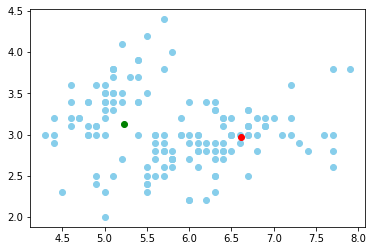

In [17]:
plt.scatter(data[:, 0], data[:, 1], color = 'skyblue')
plt.plot(irisCluster.cluster_centers_[0][0], irisCluster.cluster_centers_[0][1], 'ro', label='c1')
plt.plot(irisCluster.cluster_centers_[1][0], irisCluster.cluster_centers_[1][1], 'go', label='c2')
plt.show()

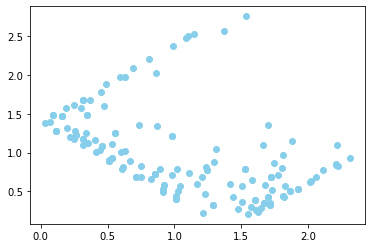

In [36]:
plt.scatter(df[0], df[1], color = 'skyblue')
plt.show()

In [38]:
from sklearn.metrics import silhouette_score
silhouette_score(data, irisCluster.labels_, metric='euclidean')

0.4629549773635977

## 군집의 갯수 결정
- 최적의 군집갯수를 구하는 단계이다.
- 비계층군집의 경우 "Elbow Method" 혹은 "silhouette_score(실루엣점수)"를 통해 최적의 군집을 구할 수 있다.

---
## 군집화 이후 추가작업
- 라벨과 데이터를 가지고 지도학습 분류로 성능 체크